In [23]:

import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [24]:
dataset = 'model/keypoint_classifier/keypoint.csv'
# model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'

# 分類数設定

In [25]:
NUM_CLASSES = 6 

# 学習データ読み込み

In [26]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [27]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [29]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [30]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_2 (Dropout)             │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 6)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,136 (4.44 KB)

 Trainable params: 1,136 (4.44 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
# モデルチェックポイントのコールバック
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [32]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [33]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/14 ━━━━━━━━━━━━━━━━━━━━ 7s 539ms/step - accuracy: 0.0625 - loss: 2.0430
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.0913 - loss: 1.9684 - val_accuracy: 0.0988 - val_loss: 1.7631
Epoch 2/1000
 1/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.1562 - loss: 1.8432
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1483 - loss: 1.7998 - val_accuracy: 0.3422 - val_loss: 1.6798
Epoch 3/1000
 1/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.1953 - loss: 1.7536
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2296 - loss: 1.7143 - val_accuracy: 0.5220 - val_loss: 1.6139
Epoch 4/1000
 1/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3047 - loss: 1.6461
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.ker

In [34]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9747 - loss: 0.1097 


In [35]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [36]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
[4.3851216e-03 4.5422548e-03 9.7556680e-01 1.3200393e-03 4.6412676e-04
 1.3721649e-02]
2


# 混同行列

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


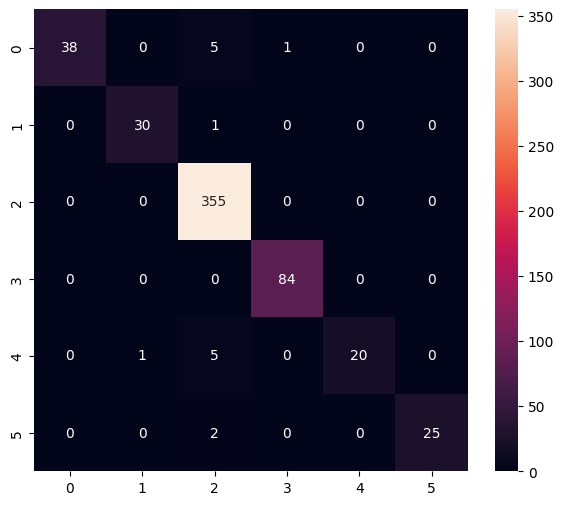

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.86      0.93        44
           1       0.97      0.97      0.97        31
           2       0.96      1.00      0.98       355
           3       0.99      1.00      0.99        84
           4       1.00      0.77      0.87        26
           5       1.00      0.93      0.96        27

    accuracy                           0.97       567
   macro avg       0.99      0.92      0.95       567
weighted avg       0.97      0.97      0.97       567



In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [38]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [39]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /var/folders/vk/_mlvb1xd2v1chm6wq1n54zl80000gn/T/tmp9m7fbdc3/assets


INFO:tensorflow:Assets written to: /var/folders/vk/_mlvb1xd2v1chm6wq1n54zl80000gn/T/tmp9m7fbdc3/assets


Saved artifact at '/var/folders/vk/_mlvb1xd2v1chm6wq1n54zl80000gn/T/tmp9m7fbdc3'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 6), dtype=tf.float32, name=None)
Captures:
  12986514272: TensorSpec(shape=(), dtype=tf.resource, name=None)
  12986514976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  12986512160: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13005568160: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13005567808: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13005567104: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1748732457.945359 1004563 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1748732457.945375 1004563 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.


6644

# 推論テスト

In [40]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

/Users/ak/miniconda3/envs/gestureEnv/lib/python3.10/site-packages/tensorflow/lite/python/interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


In [41]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [42]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [43]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 137 μs, sys: 41 μs, total: 178 μs
Wall time: 190 μs


In [44]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[4.3851193e-03 4.5422525e-03 9.7556680e-01 1.3200387e-03 4.6412635e-04
 1.3721643e-02]
2
